<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Ridge_regression_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['Target'] = data.target

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = .2 , random_state = 32)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [ ]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
  reg = Ridge(alpha = i)
  reg.fit(x_train,y_train)
  coefs.append(reg.coef_.tolist())
  y_pred = reg.predict(x_test)
  r2_scores.append(r2_score(y_test,y_pred))


In [ ]:
coefs

[[32.50000077850852,
  -274.20835690275277,
  501.52744069224883,
  368.79319609716373,
  -822.3112098781706,
  504.23867319224627,
  101.57697154693861,
  158.16545686716591,
  744.9154171205546,
  78.40553631547449],
 [18.11150020304957,
  -2.947673231999189,
  64.53425911430197,
  49.25380663767099,
  17.249683537264907,
  12.197476755588625,
  -40.21496581227648,
  40.107976048773004,
  60.21162827824091,
  39.761936775384314],
 [2.389725881772569,
  0.12918769155257304,
  7.677108955301937,
  5.906542037781741,
  2.5955790365033673,
  2.0699104088883753,
  -4.986754961212085,
  5.281068762453778,
  7.338247083713252,
  5.045231186141828],
 [0.2466204422361929,
  0.01881997137747046,
  0.7832915887917894,
  0.603185562222812,
  0.27148551248917707,
  0.21875218293376897,
  -0.5111675353509668,
  0.5449737072230577,
  0.7508918858782134,
  0.5184224697462401]]

In [ ]:
r2_scores

[0.4522338796354569,
 0.1607000851957444,
 0.014481188172243864,
 -0.006888987957152759]

Text(0.5, 1.0, 'Alpha = 1000 ,r2_score = -0.01')

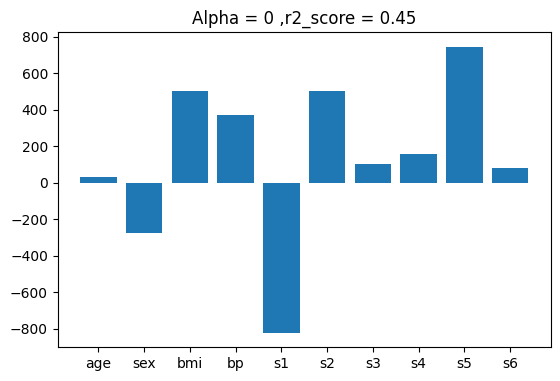

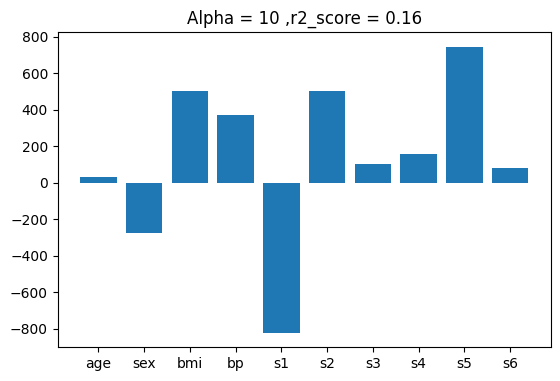

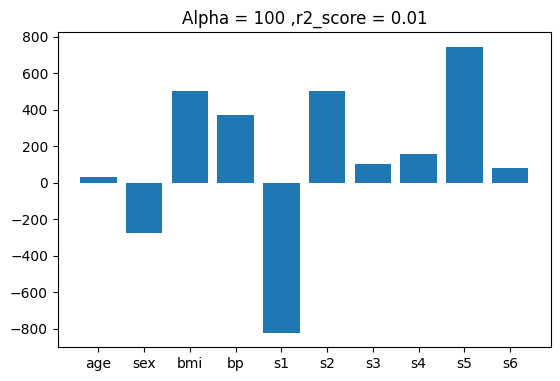

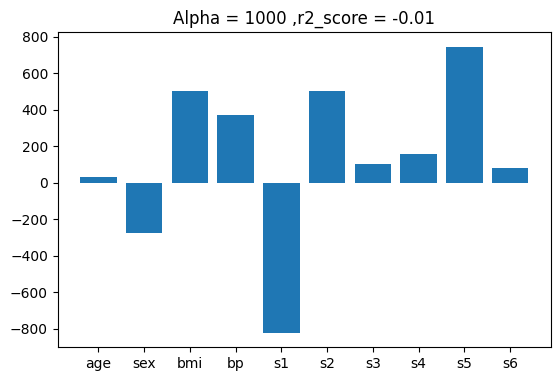

In [ ]:
plt.figure(figsize= (14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))
plt.figure(figsize= (14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))
plt.figure(figsize= (14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))
plt.figure(figsize= (14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

In [ ]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())

In [ ]:
input_array = np.array(coefs)

In [ ]:
coef_df = pd.DataFrame(input_array,columns = data.feature_names)
coef_df['Alpha'] = alphas
coef_df.set_index('Alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Alpha,,,,,,,,,,
0.0000,32.500001,-274.208357,501.527441,368.793196,-822.311210,504.238673,101.576972,158.165457,744.915417,78.405536
0.0001,32.524721,-274.147285,501.568619,368.761266,-811.280054,495.501467,96.738071,156.934206,740.701078,78.523295
0.0010,32.725996,-273.615964,501.844264,368.472563,-724.321904,426.625001,58.660893,147.311724,707.412889,79.478308
0.0100,33.853115,-269.077343,500.713885,365.539068,-359.232547,137.628427,-98.355189,110.296561,564.695597,84.711604
0.1000,37.931721,-232.888871,465.780703,338.231265,-77.751090,-69.164506,-194.220900,103.487181,420.141090,103.794101
1.0000,45.302562,-84.404403,279.160326,205.836527,8.750672,-21.864544,-143.516520,106.802873,242.365121,119.763717
10.0000,18.111500,-2.947673,64.534259,49.253807,17.249684,12.197477,-40.214966,40.107976,60.211628,39.761937
100.0000,2.389726,0.129188,7.677109,5.906542,2.595579,2.069910,-4.986755,5.281069,7.338247,5.045231
1000.0000,0.246620,0.018820,0.783292,0.603186,0.271486,0.218752,-0.511168,0.544974,0.750892,0.518422


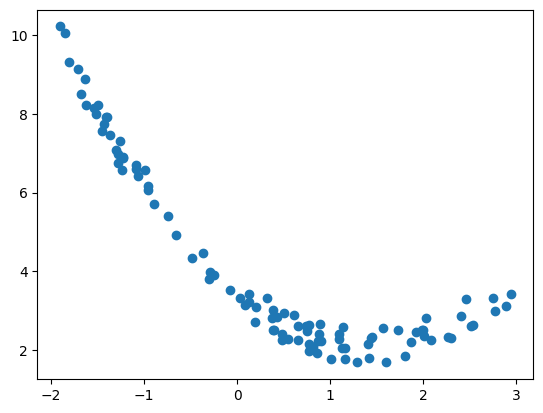

In [ ]:
m = 100
x = 5*np.random.rand(m,1) - 2
y = .7*x**2 - 2*x + 3 + np.random.rand(m,1)

plt.scatter(x,y)
plt.show()

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x.reshape(100,1),y.reshape(100),test_size = .2 , random_state = 42),
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 10)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)


ValueError: not enough values to unpack (expected 4, got 1)

In [46]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, x_train, y_train, x_test, y_test,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

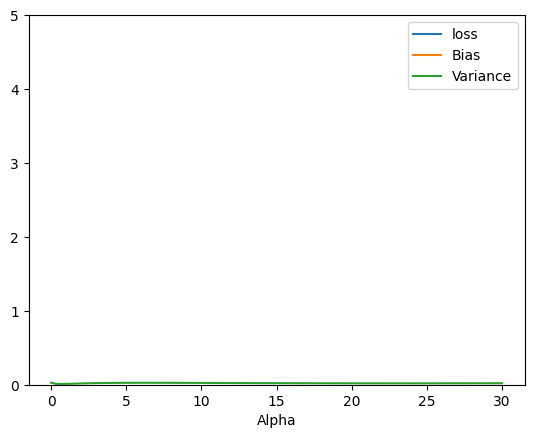

In [48]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


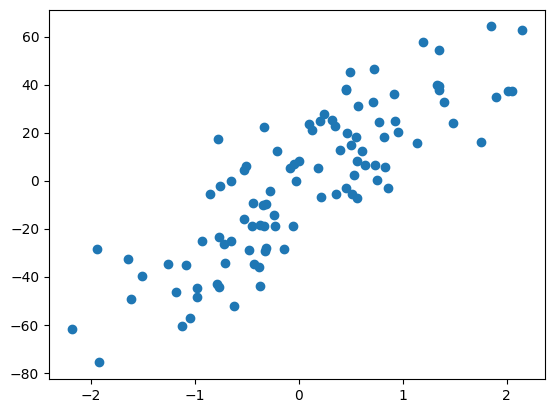

In [49]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [50]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [51]:
def predict(m):
    return m*X - 2.29

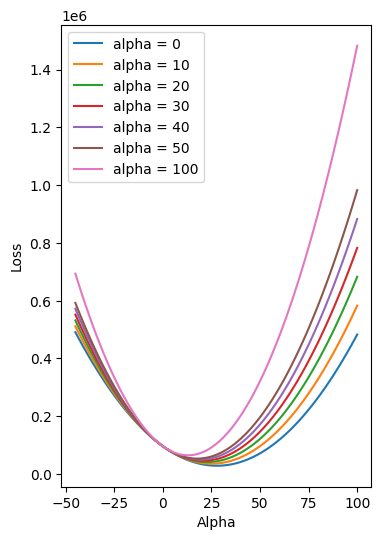

In [52]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()